<a href="https://colab.research.google.com/github/ShubhamJadhav03/AIML/blob/main/IrisCluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Use iris flower dataset from sklearn library and try to form clusters of flowers using petal width and length features. Drop other two features for simplicity.
Figure out if any preprocessing such as scaling would help here
Draw elbow plot and from that figure out optimal value of k

In [34]:
from sklearn.datasets import load_iris
iris = load_iris()

In [35]:
import pandas as pd

In [36]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)

In [37]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [38]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [39]:
km = KMeans(n_clusters = 3)

In [40]:
km

KMeans(n_clusters=3)

In [41]:
df.drop(['sepal length (cm)', 'sepal width (cm)' ], axis = 'columns', inplace = True)

In [42]:
y_predict = km.fit_predict(df)

In [43]:
df['cluster'] = y_predict
df.head(3)

,petal length (cm),petal width (cm),cluster
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1


In [46]:
df['cluster'].unique()

array([1, 0, 2], dtype=int32)

In [47]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

In [48]:
from matplotlib import pyplot as plt

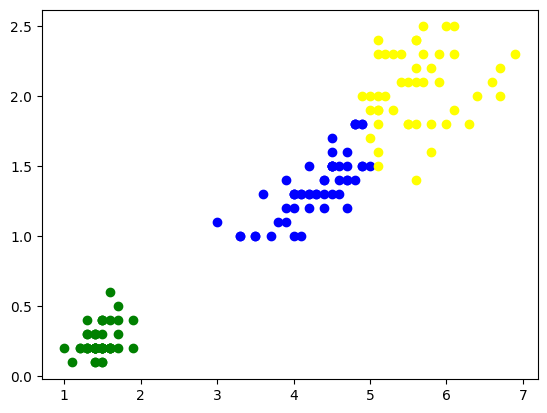

In [49]:
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='blue')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='green')
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],color='yellow')

In [51]:
sse = []
k_range = range(1,10)
for k in k_range:
  km = KMeans(n_clusters = k)
  km.fit(df)
  sse.append(km.inertia_)

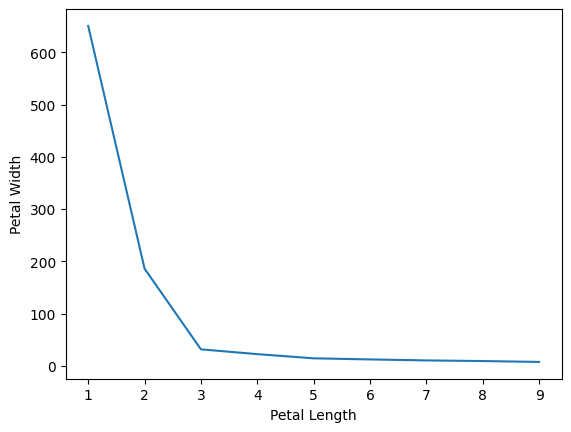

In [52]:
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.plot(k_range, sse)